<a href="https://colab.research.google.com/github/Lohith288/AI-ML-INTERNSHIP-VRSEC/blob/main/TASK12D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GETTING REQURIED LIBRARIES**

In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **READING THE DATA SETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/Used Car Dataset.csv')

In [ ]:
train.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [ ]:
train.dtypes

Unnamed: 0              int64
car_name               object
registration_year      object
insurance_validity     object
fuel_type              object
seats                   int64
kms_driven              int64
ownsership             object
transmission           object
manufacturing_year     object
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object

In [ ]:
train.tail()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75
1552,1552,2018 Maruti Swift Dzire VXI,May-18,Comprehensive,Petrol,5,34756,First Owner,Manual,2018,20.85,1197.0,1197.0,8314.0,6.10


### **CHECKING THE DATA SET**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [ ]:
train.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [ ]:
train.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'Unnamed: 0' has 1553 unique values.
Column 'car_name' has 925 unique values.
Column 'registration_year' has 178 unique values.
Column 'insurance_validity' has 6 unique values.
Column 'fuel_type' has 4 unique values.
Column 'seats' has 6 unique values.
Column 'kms_driven' has 710 unique values.
Column 'ownsership' has 22 unique values.
Column 'transmission' has 13 unique values.
Column 'manufacturing_year' has 19 unique values.
Column 'mileage(kmpl)' has 333 unique values.
Column 'engine(cc)' has 148 unique values.
Column 'max_power(bhp)' has 148 unique values.
Column 'torque(Nm)' has 282 unique values.
Column 'price(in lakhs)' has 630 unique values.


### **COLUMNS OF THE DATA SET**

In [ ]:
train.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

### **CORRELATION MATRIX ***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

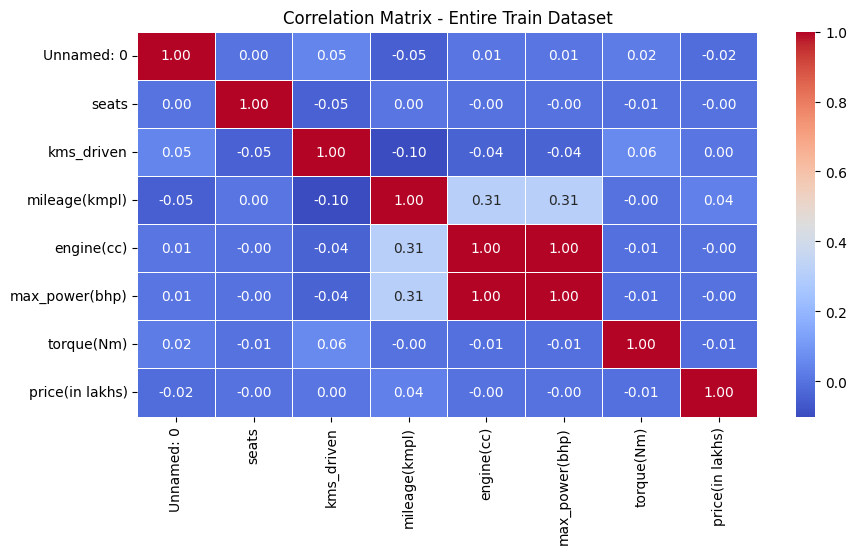

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train' with your dataset
train = pd.read_csv('/content/Used Car Dataset.csv')

# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
N = 10

# Calculate absolute correlation values for each feature
correlation_values = correlation_matrix.abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)

# Exclude self-correlations and duplicate correlations
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

# Select the top 10 features with highest absolute correlation values
top_features = sorted_correlation[:N]

print("Top", N, "features based on correlation:")
print(top_features)

Top 10 features based on correlation:
max_power(bhp)  engine(cc)        1.000000
engine(cc)      max_power(bhp)    1.000000
max_power(bhp)  mileage(kmpl)     0.309130
engine(cc)      mileage(kmpl)     0.309130
mileage(kmpl)   max_power(bhp)    0.309130
                engine(cc)        0.309130
kms_driven      mileage(kmpl)     0.100332
mileage(kmpl)   kms_driven        0.100332
kms_driven      torque(Nm)        0.059218
torque(Nm)      kms_driven        0.059218
dtype: float64


### **EDA**

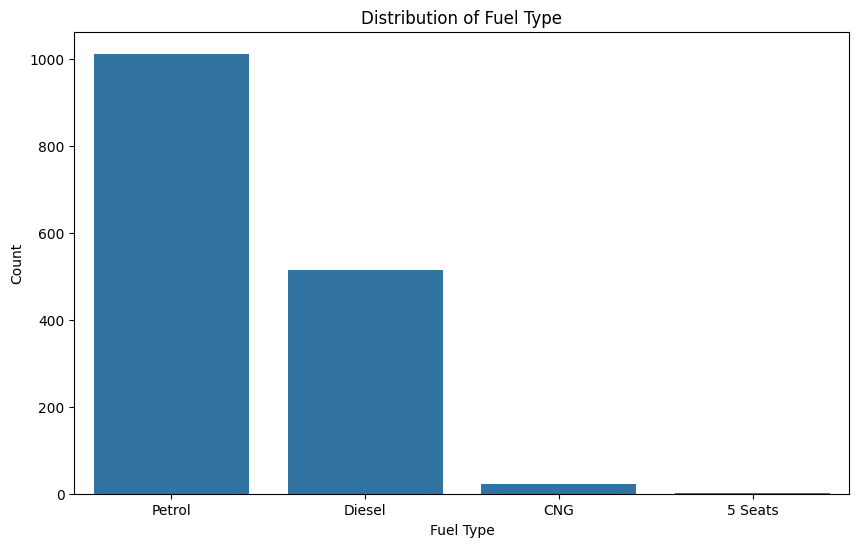

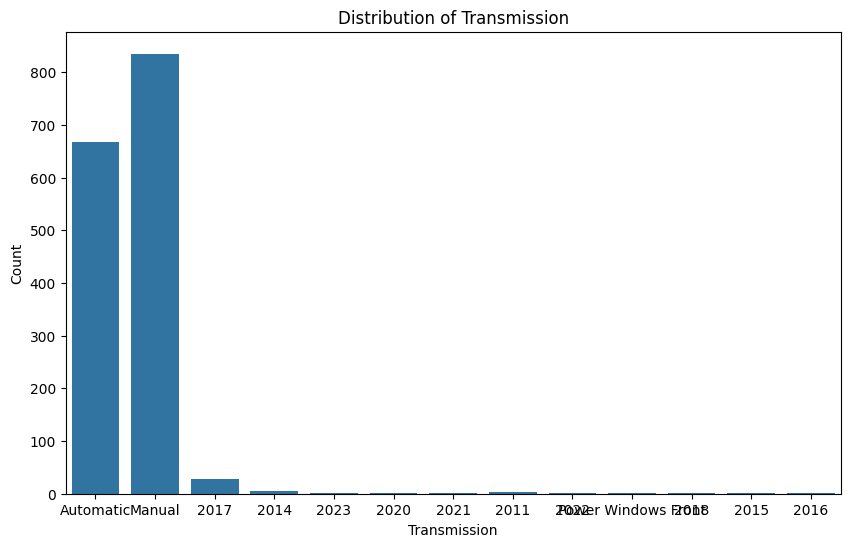

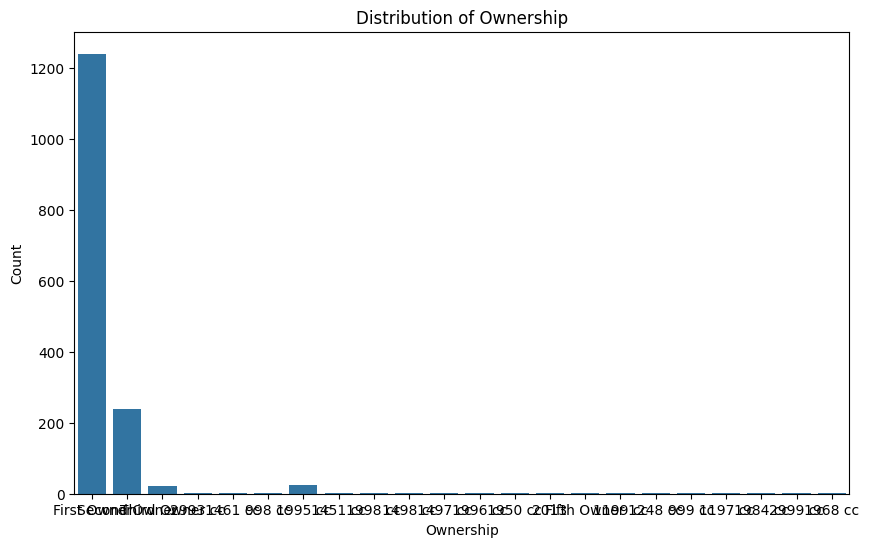

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for 'fuel_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Bar plot for 'transmission'
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df)
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

# Bar plot for 'ownsership'
plt.figure(figsize=(10, 6))
sns.countplot(x='ownsership', data=df)
plt.title('Distribution of Ownership')
plt.xlabel('Ownership')
plt.ylabel('Count')
plt.show()


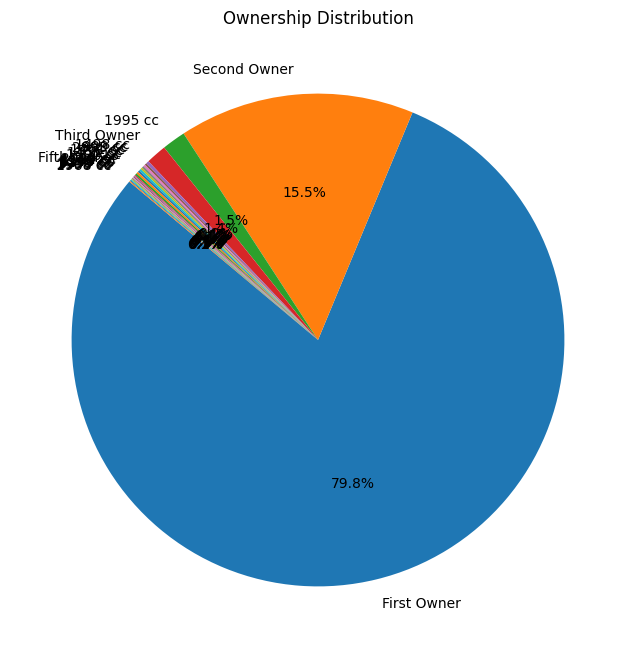

In [ ]:
# Pie chart for 'ownsership'
ownership_counts = df['ownsership'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ownership Distribution')
plt.show()


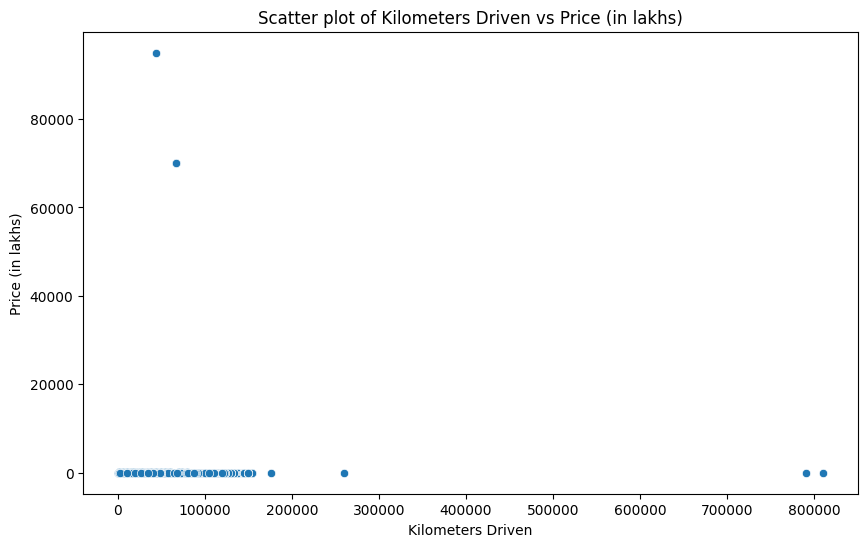

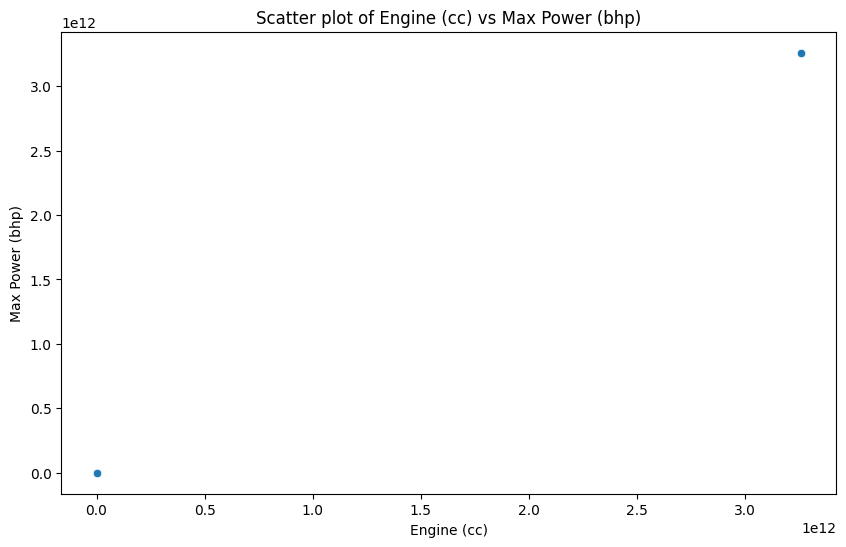

In [ ]:
# Scatter plot for 'kms_driven' vs 'price(in lakhs)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price(in lakhs)', data=df)
plt.title('Scatter plot of Kilometers Driven vs Price (in lakhs)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in lakhs)')
plt.show()

# Scatter plot for 'engine(cc)' vs 'max_power(bhp)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine(cc)', y='max_power(bhp)', data=df)
plt.title('Scatter plot of Engine (cc) vs Max Power (bhp)')
plt.xlabel('Engine (cc)')
plt.ylabel('Max Power (bhp)')
plt.show()


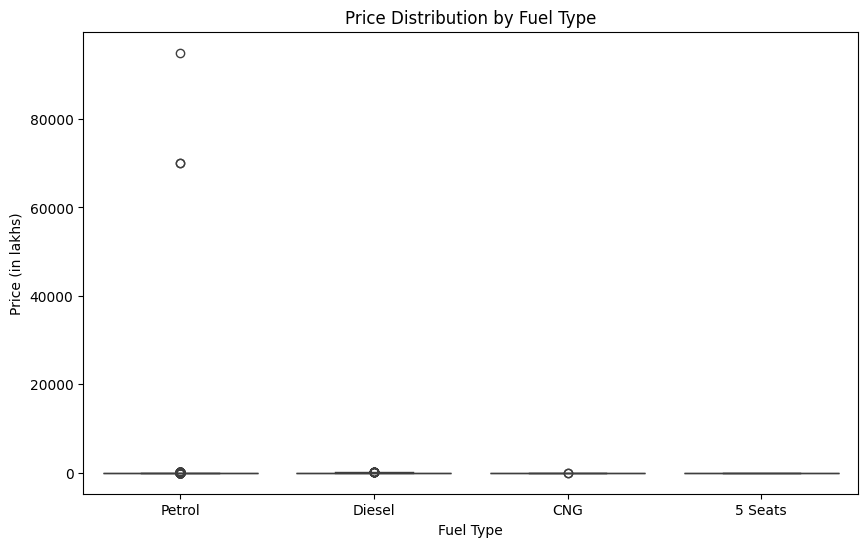

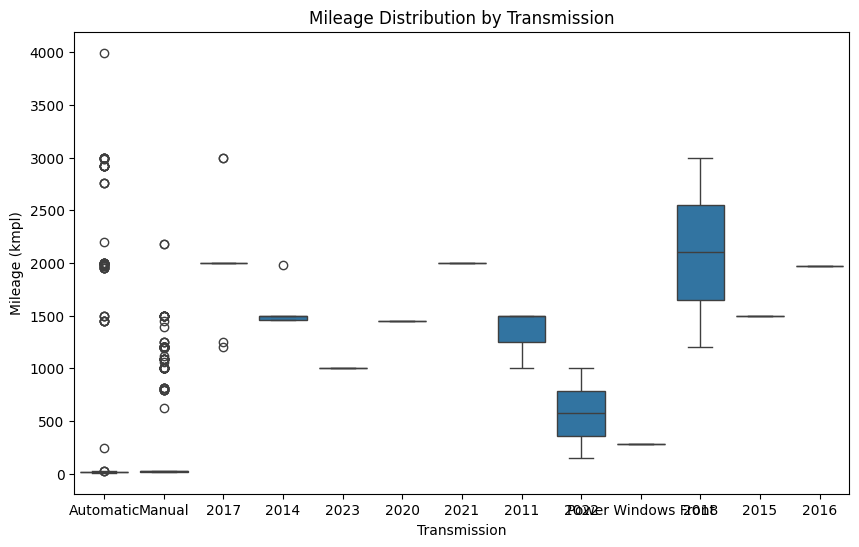

In [ ]:
# Box plot for 'price(in lakhs)'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price(in lakhs)', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in lakhs)')
plt.show()

# Box plot for 'mileage(kmpl)'
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='mileage(kmpl)', data=df)
plt.title('Mileage Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mileage (kmpl)')
plt.show()


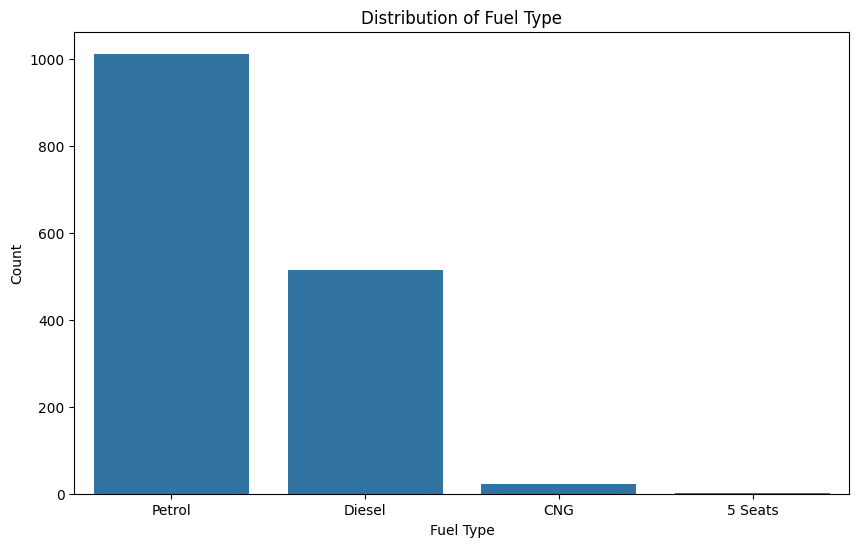

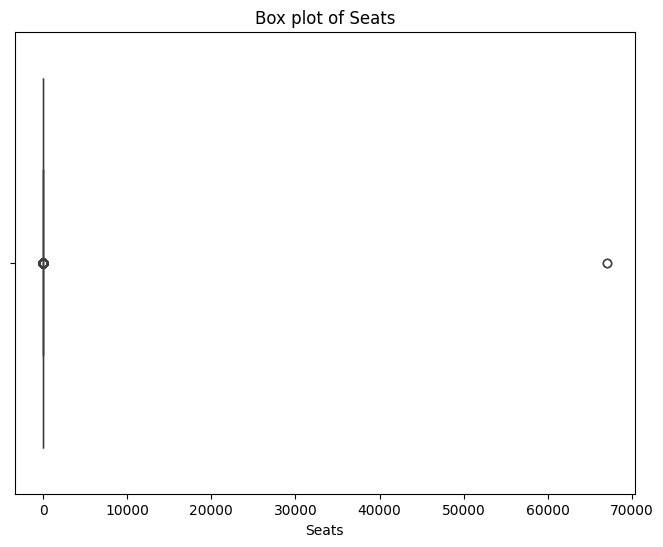

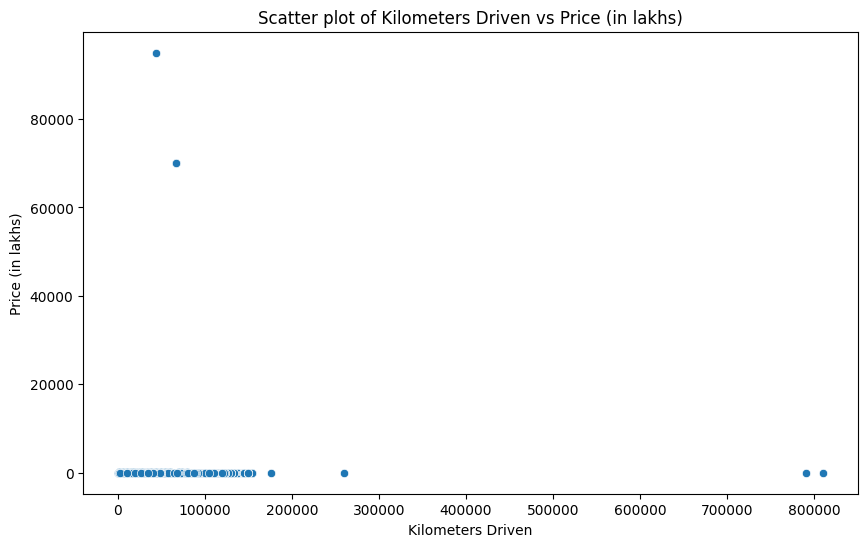

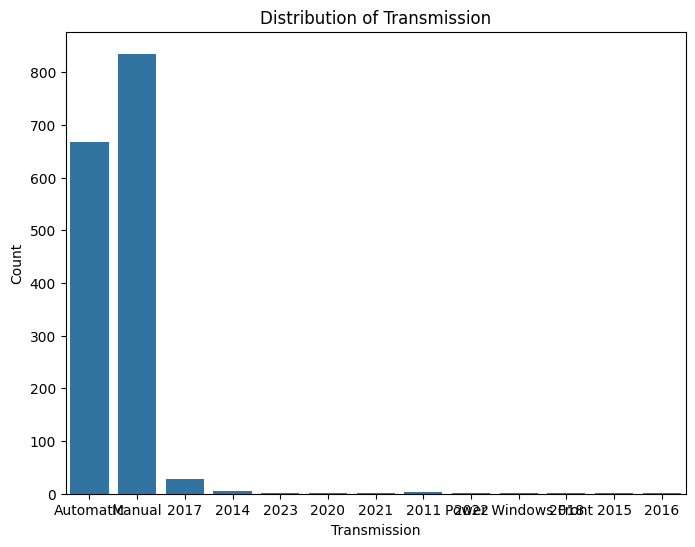

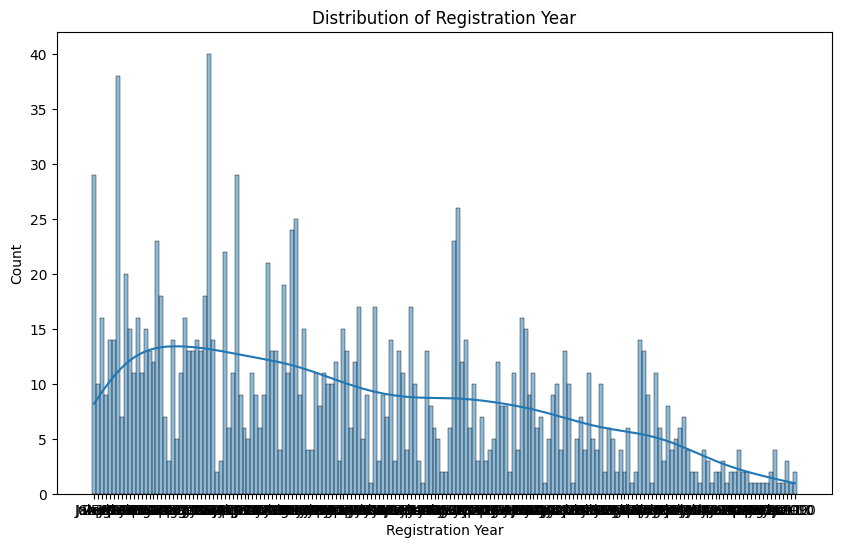

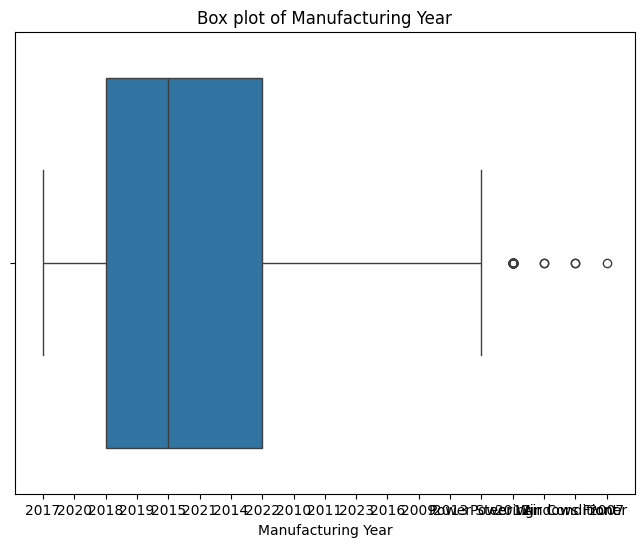

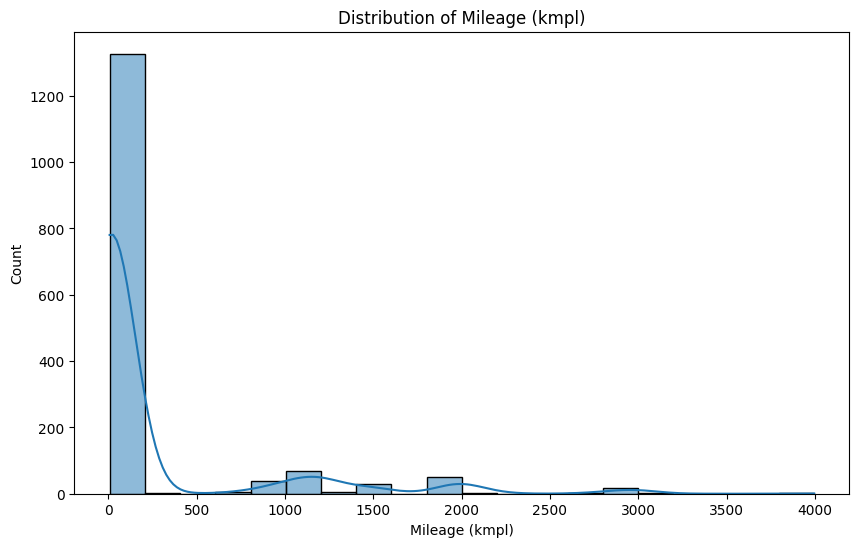

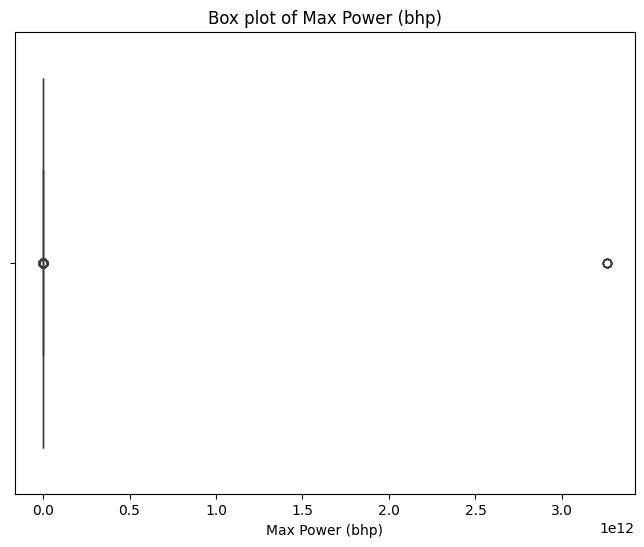

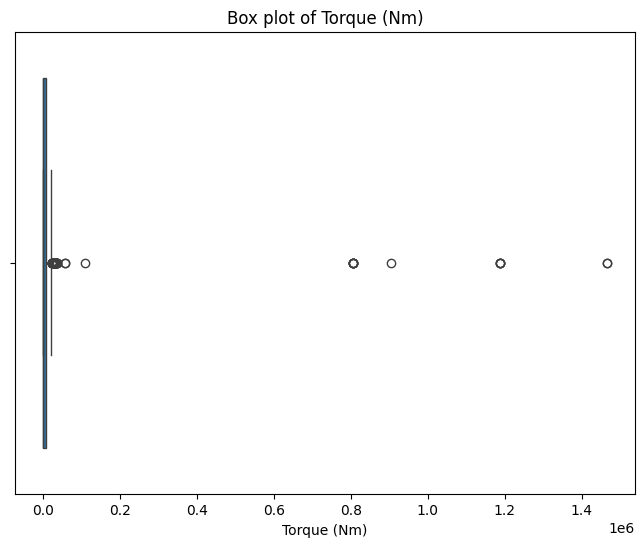

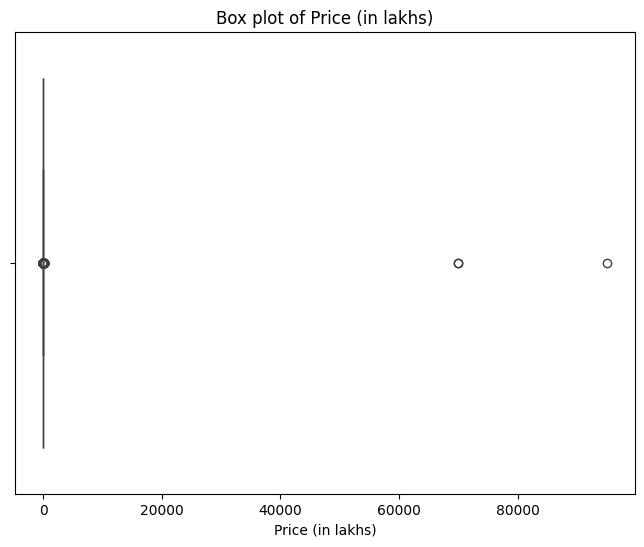

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming 'df' is your DataFrame
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method


# Bar plot for Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()



# Box plot for Seats
plt.figure(figsize=(8, 6))
sns.boxplot(x='seats', data=df)
plt.title('Box plot of Seats')
plt.xlabel('Seats')
plt.show()

# Scatter plot for Kilometers Driven vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price(in lakhs)', data=df)
plt.title('Scatter plot of Kilometers Driven vs Price (in lakhs)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in lakhs)')
plt.show()

# Bar plot for Transmission
plt.figure(figsize=(8, 6))
sns.countplot(x='transmission', data=df)
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

# Histogram for Registration Year
plt.figure(figsize=(10, 6))
sns.histplot(df['registration_year'], bins=20, kde=True)
plt.title('Distribution of Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.show()

# Box plot for Manufacturing Year
plt.figure(figsize=(8, 6))
sns.boxplot(x='manufacturing_year', data=df)
plt.title('Box plot of Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.show()

# Histogram for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage(kmpl)'], bins=20, kde=True)
plt.title('Distribution of Mileage (kmpl)')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Count')
plt.show()



# Box plot for Max Power
plt.figure(figsize=(8, 6))
sns.boxplot(x='max_power(bhp)', data=df)
plt.title('Box plot of Max Power (bhp)')
plt.xlabel('Max Power (bhp)')
plt.show()

# Box plot for Torque
plt.figure(figsize=(8, 6))
sns.boxplot(x='torque(Nm)', data=df)
plt.title('Box plot of Torque (Nm)')
plt.xlabel('Torque (Nm)')
plt.show()

# Box plot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='price(in lakhs)', data=df)
plt.title('Box plot of Price (in lakhs)')
plt.xlabel('Price (in lakhs)')
plt.show()


# **REGRESSION USING GRID SEARCH**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [ ]:
car_data = pd.read_csv('/content/Used Car Dataset.csv')

In [ ]:
# Define features and target
X_reg = car_data.drop(columns=['Unnamed: 0', 'car_name', 'registration_year'])
y_reg = car_data['price(in lakhs)']


In [ ]:
# Split data into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("mobile price classification.csv")

# Prepare X and y
X = df.drop(['price_range'], axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their respective parameter grids for regression
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso Regression': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Decision Tree Regressor': (DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    })
}

# Iterate over models, perform GridSearchCV, and print results
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best negative mean squared error for {model_name}: {grid_search.best_score_}")

    # Evaluate model on test set
    y_pred = grid_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"Test mean squared error for {model_name}: {test_mse}\n")


Performing GridSearchCV for Linear Regression...
Best parameters for Linear Regression: {}
Best negative mean squared error for Linear Regression: -0.10344002119259903
Test mean squared error for Linear Regression: 0.10469290211930678

Performing GridSearchCV for Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 10.0}
Best negative mean squared error for Ridge Regression: -0.1033959796230973
Test mean squared error for Ridge Regression: 0.10466568098230024

Performing GridSearchCV for Lasso Regression...
Best parameters for Lasso Regression: {'alpha': 0.1}
Best negative mean squared error for Lasso Regression: -0.102420907343684
Test mean squared error for Lasso Regression: 0.10489969890495524

Performing GridSearchCV for Decision Tree Regressor...
Best parameters for Decision Tree Regressor: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best negative mean squared error for Decision Tree Regressor: -0.13838669217687075
Test m